### 1. Global methane levels from 2002

In [2]:
# Import modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Open the netCDF4 file
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
# Check the data
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

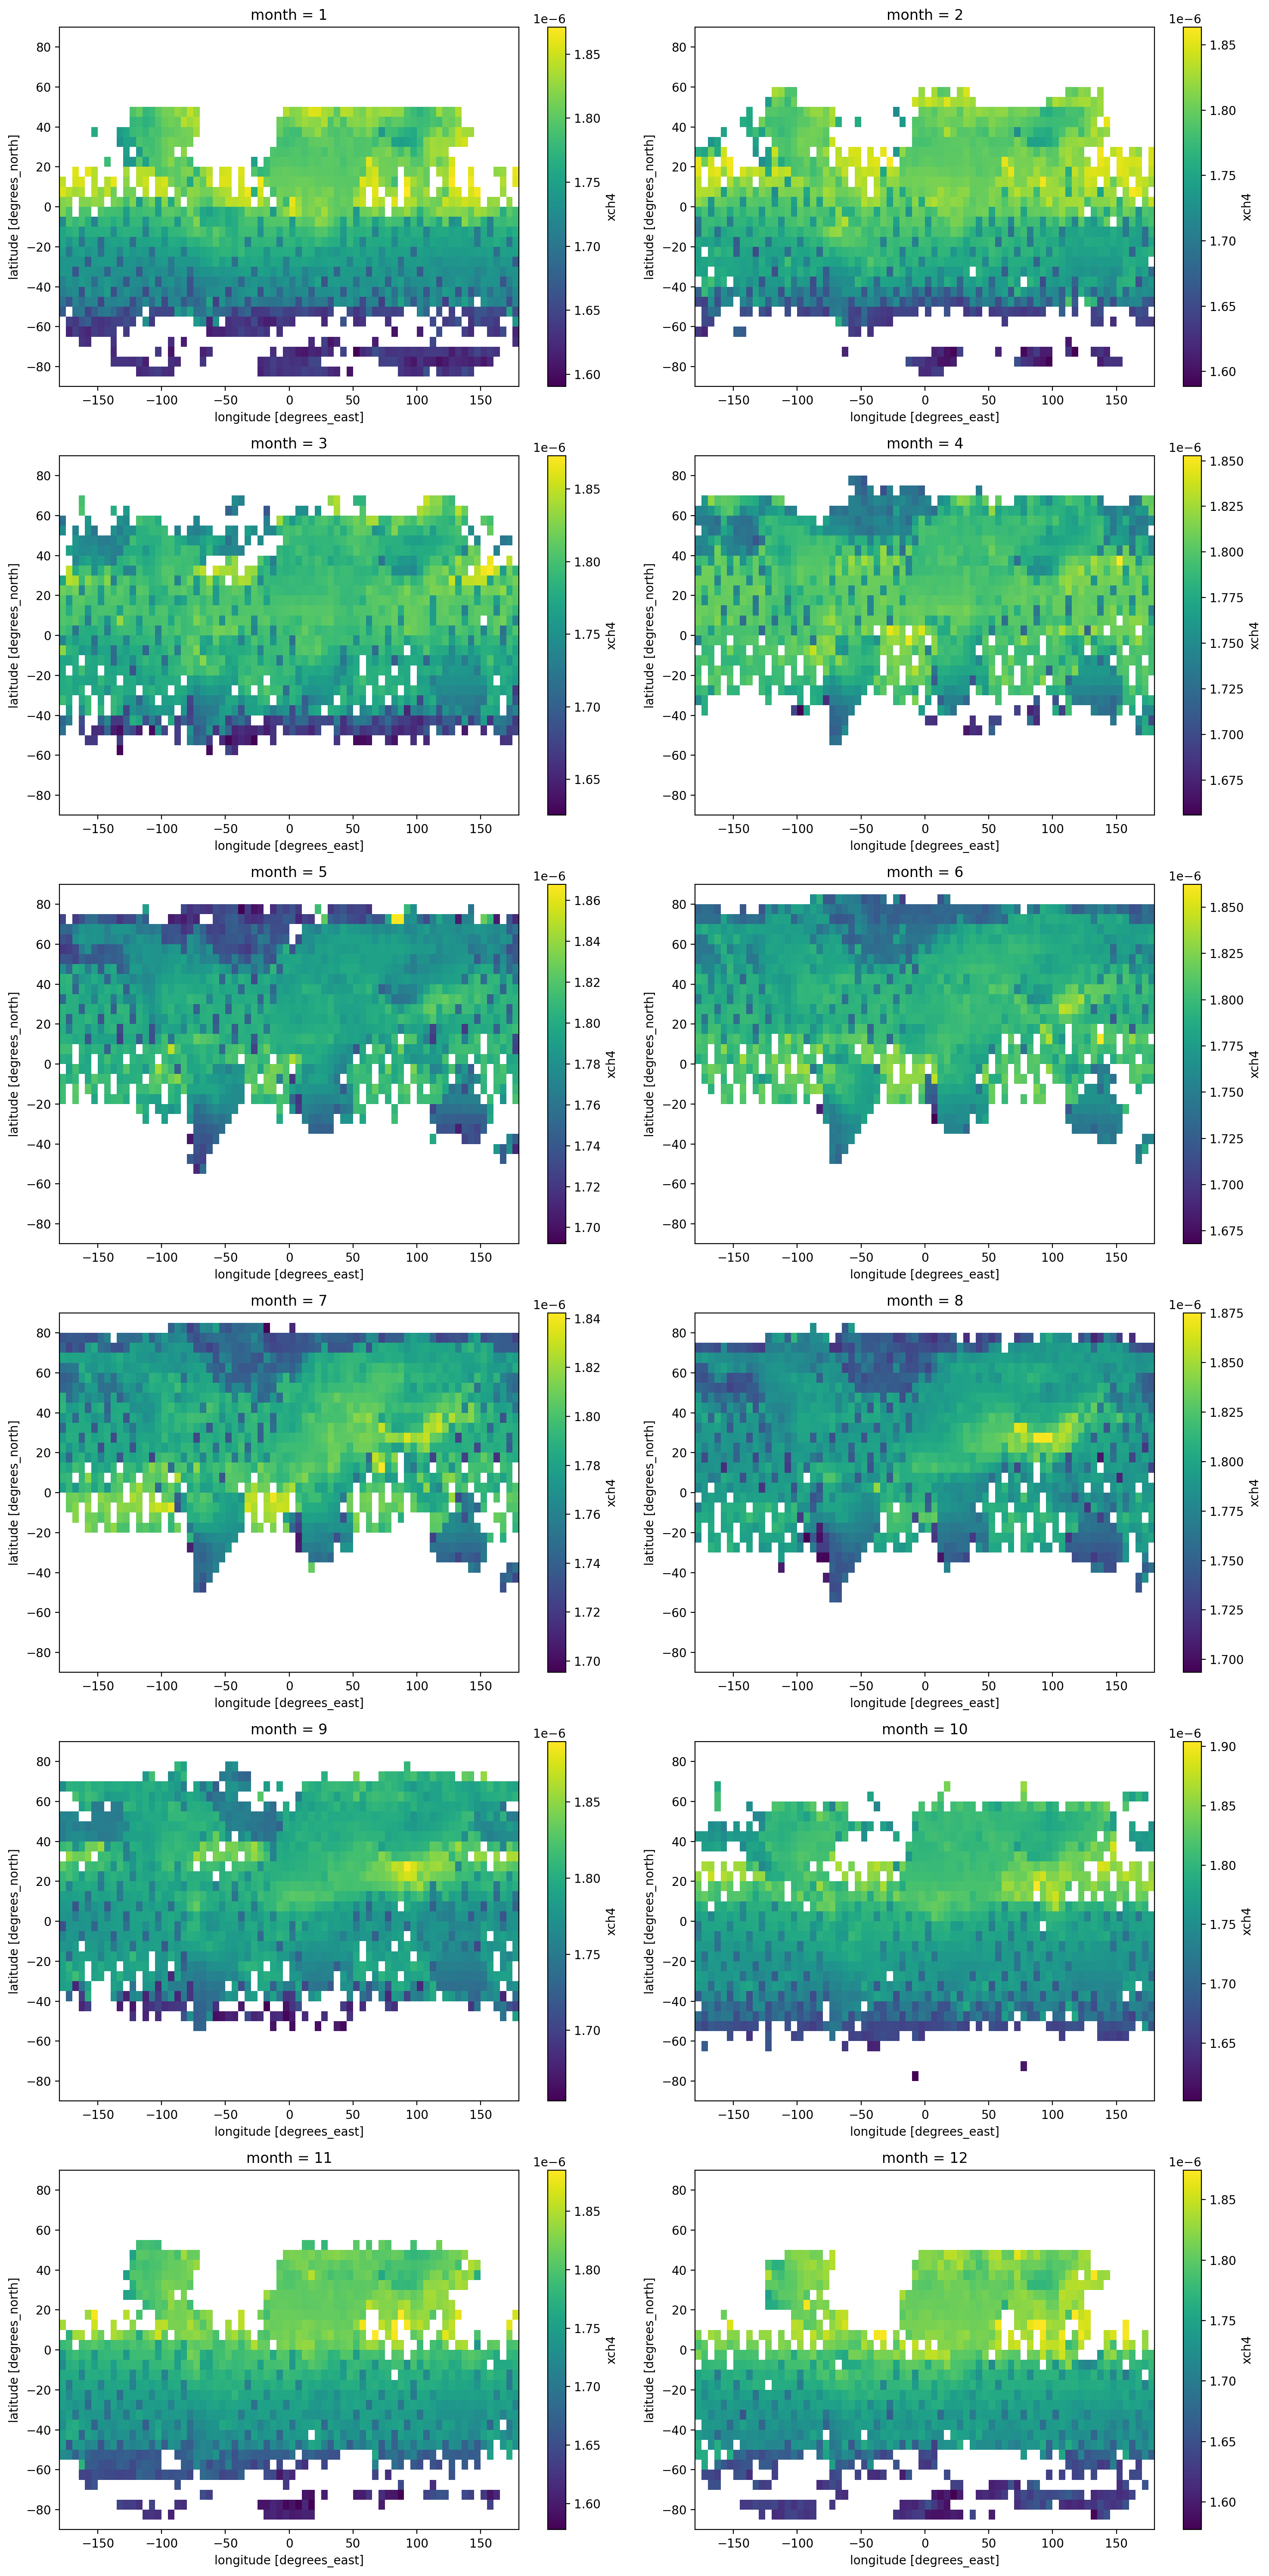

In [136]:
# 1.1 Calculate the climatology 
xch4_clim = ds.xch4.groupby('time.month').mean()
# Create Figure
plt.figure(figsize=(15,30), dpi=200)
for i in range(12):
    plt.subplot(6,2,i+1)
    xch4_clim[i,:,:].plot()
# Using a tight layout
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


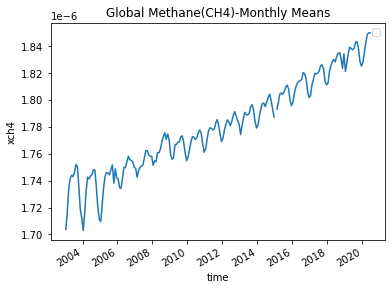

In [20]:
# 1.2
# 取时间2003-01到2020-06的数据画图
ds.xch4.mean(dim=('lon', 'lat')).sel(time=slice("2003-01", "2020-06")).plot()
plt.title("Global Methane(CH4)-Monthly Means")

全球月平均甲烷含量呈现波动上升趋势，侧面反映出全球变暖趋势。

F:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
F:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


Text(0, 0.5, 'xch4 levels')

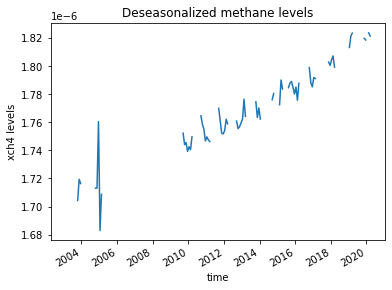

In [54]:
# 1.3
#取[15°S, 150°W]，时间2003-01到2020-06的数据
ds.xch4.sel(lon=-150, lat=-15, method='nearest').sel(time=slice("2003-01", "2020-06")).plot()
# 添加题目和标签
plt.title("Deseasonalized methane levels")
plt.ylabel('xch4 levels')

该区域内月甲烷含量缺失了2005到2009的部分数据，大体上呈逐年波动上升趋势，可能是受人类活动影响，甲烷排放量增加。

### 2. Niño 3.4 index

In [24]:
# 读取文件
ds_sst = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# 检查文件
ds_sst

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [36]:
# 2.1 Group data by month
group_data = ds_sst.sst.sel(lon=slice(10,60), lat=slice(-5,5)).groupby('time.month')

# subtract climatology from SST time series
sst_anom = group_data - group_data.mean(dim='time')
sst_anom

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.60674286, -0.50588036,         nan, ..., -0.36339378,
         -0.43619156, -0.51127625],
        [-0.5201931 ,         nan,         nan, ..., -0.44073296,
         -0.5194073 , -0.5755749 ],
        [-0.29296112,         nan,         nan, ..., -0.5026531 ,
         -0.56803703, -0.5872021 ],
        [-0.13145065,         nan,         nan, ..., -0.5383892 ,
         -0.56505966, -0.5461521 ],
        [-0.07009697,         nan,         nan, ..., -0.50204086,
         -0.5249176 , -0.49378967]],

       [[-0.59535027, -0.6057911 ,         nan, ..., -0.31674957,
         -0.3692093 , -0.41083717],
        [-0.49298477,         nan,         nan, ..., -0.43806267,
         -0.47989655, -0.49866295],
        [-0.41654968,         nan,         nan, ..., -0.48603058,
         -0.5187359 , -0.5168381 ],
        [-0.5158005 ,         nan,         nan, ..., -0.49408722,
         -0.5073223 , -0.4898739 ],
        [-0.6185341 ,         nan,         nan, ..., -0.46426773,
...
          0.5917759 ,  0.53757286],
        [ 0.04763985,         nan,         nan, ...,  0.7192421 ,
          0.59300804,  0.50037   ],
        [ 0.4706192 ,         nan,         nan, ...,  0.65768623,
          0.494627  ,  0.42136192],
        [ 1.0252533 ,         nan,         nan, ...,  0.5190582 ,
          0.40670204,  0.38578033],
        [ 1.3565502 ,         nan,         nan, ...,  0.43827438,
          0.39917183,  0.40039635]],

       [[ 0.02007484, -0.15268326,         nan, ...,  0.47757912,
          0.45871544,  0.43340492],
        [ 0.01241493,         nan,         nan, ...,  0.59612465,
          0.5204334 ,  0.46548653],
        [ 0.22843933,         nan,         nan, ...,  0.5844021 ,
          0.47134972,  0.4084549 ],
        [ 0.54767036,         nan,         nan, ...,  0.47873878,
          0.39263725,  0.35586166],
        [ 0.7483921 ,         nan,         nan, ...,  0.40960693,
          0.38807487,  0.37768745]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 10.0 12.0 14.0 16.0 18.0 ... 52.0 54.0 56.0 58.0 60.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

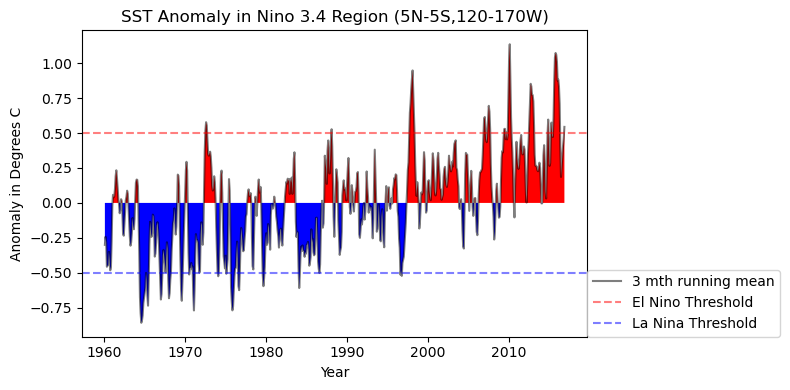

In [72]:
# 2.2
#3个月滚动平均
sst_rolling = sst_anom.rolling(time = 3, center= True).mean()

#regional mean
regional_mean = sst_rolling.mean(dim=['lat', 'lon'])

# 创建画布
plt.figure(figsize=(8,4), dpi=100)

#填充图形
plt.fill_between(regional_mean.time.values, 0, regional_mean.values,where= regional_mean.values>0, facecolor = 'red')
plt.fill_between(regional_mean.time.values, 0, regional_mean.values,where= regional_mean.values<0, facecolor = 'blue')
plt.plot(regional_mean.time.values,regional_mean.values, color = "black", alpha = 0.5, label = '3 mth running mean')
plt.axhline(y = 0.5, ls = '--', color = 'red', alpha = 0.5, label = 'El Nino Threshold')
plt.axhline(y = -0.5, ls = '--', color = 'blue', alpha = 0.5, label = 'La Nina Threshold')

# 标题、坐标轴和图例
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)')
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
plt.tight_layout()
plt.show()

### 3. Explore a netCDF dataset

In [106]:
# 读取文件
ds_t = xr.open_dataset("2016-2020-T.nc", engine="netcdf4")
# 检查文件
ds_t

<xarray.Dataset>
Dimensions:    (longitude: 11, latitude: 6, time: 43848)
Coordinates:
  * longitude  (longitude) float32 113.7 113.8 113.9 114.0 ... 114.5 114.6 114.7
  * latitude   (latitude) float32 22.9 22.8 22.7 22.6 22.5 22.4
  * time       (time) datetime64[ns] 2016-01-01 ... 2020-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-19 04:07:46 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

F:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
F:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


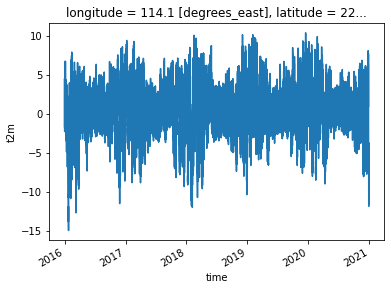

In [129]:
# 3.1
# Group data by month
group_t = ds_t.t2m.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
t2m_anom = group_t - group_t.mean(dim='time')
# t2m_anom.plot()

# Plot anomalies 绘制衡阳附近(114.1,22.5)的 t2m 时间序列图
t2m_anom.sel(longitude=114.1, latitude=22.5,method='nearest').plot()

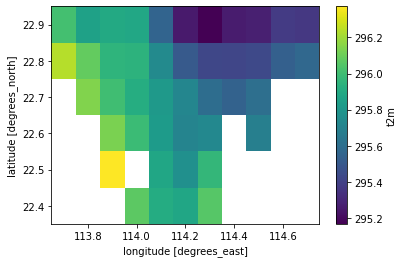

In [122]:
# 3.2 第一张图：t2m在空间的平均分布
ds_t.t2m.mean(dim='time').plot()

Text(0.5, 1.0, 'Trend of t2m in latitudinal direction')

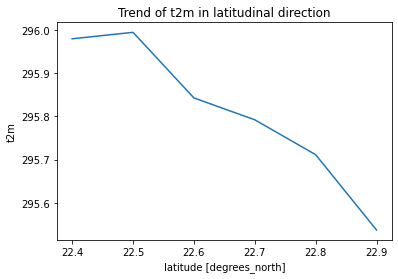

In [116]:
# 第二张图：t2m平均值在纬度方向的变化趋势
ds_t.t2m.mean(axis=(0,2)).plot()
plt.title('Trend of t2m in latitudinal direction')

Text(0.5, 1.0, 'Trend of t2m in longitudinal direction')

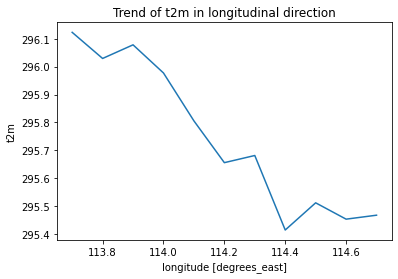

In [123]:
# 第三张图：t2m平均值在经度方向的变化趋势
ds_t.t2m.mean(axis=(0,1)).plot()
plt.title('Trend of t2m in longitudinal direction')

Text(0.5, 1.0, 'The maximum t2m in study region')

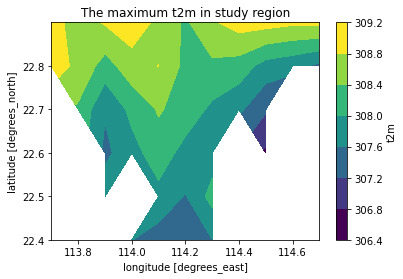

In [134]:
# 第四张图：研究区最大 t2m 值的分布
temp = ds_t['t2m'][:,:,:]
temp.max(axis=0).plot.contourf()
plt.title('The maximum t2m in study region')

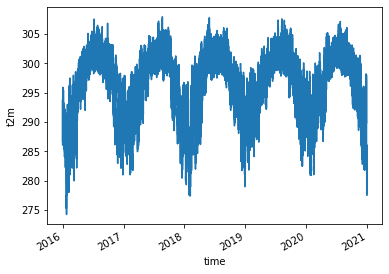

In [127]:
# 第五张图：矫正后t2m的时间序列图
weight = np.cos(np.deg2rad(ds_t.latitude))
ds_t_weighted = ds_t.t2m.weighted(weight)
ds_t_weighted.mean(dim=('longitude','latitude')).plot()